<a href="https://colab.research.google.com/github/jrjames83/python-pandas-udemy/blob/main/Garmin_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Foundation for web scraping
# Parsing structured data
# Understanding data types and conversions
# Getting arbitrary data into a dataframe

# Data science is a lot easier when you're a good programmer!
# https://github.com/jrjames83/python-pandas-udemy

In [2]:
import requests 
import pandas as pd 
from bs4 import BeautifulSoup

In [3]:
url = "https://raw.githubusercontent.com/jrjames83/python-pandas-udemy/main/garmin.gpx"
resp = requests.get(url)
resp.status_code

200

In [4]:
len(resp.text) #2,489,508

2489508

In [5]:
soup = BeautifulSoup(resp.text, "html.parser")
type(soup)

bs4.BeautifulSoup

In [6]:
points = soup.find_all("trkpt")
len(points)

6722

In [7]:
points[0].find('time')
# lat, lon, time, hr, cad

<time>2021-06-19T17:47:48.000Z</time>

In [8]:
# points[0].attrs#, points[0]
points[0].find('time').get_text()

'2021-06-19T17:47:48.000Z'

In [9]:
# For each point, return a dictionary, with {lat, lon, time, hr, cad}
def get_data_from_point(p) -> dict:
  return {
      'lat': p.attrs['lat'],
      'lon': p.attrs['lon'],
      'time': p.find('time').get_text(), 
      'hr': p.find('extensions').find('ns3:hr').get_text(),
      'cad': p.find('extensions').find('ns3:cad').get_text()
  }

get_data_from_point(points[0])

{'cad': '58',
 'hr': '93',
 'lat': '39.54318523406982421875',
 'lon': '-105.1520966179668903350830078125',
 'time': '2021-06-19T17:47:48.000Z'}

In [10]:
# Get all the points, run them through our function and store the returned value in another list
proc_points = []

for point in points:
  output = get_data_from_point(point)
  proc_points.append(output)

assert len(proc_points) == 6722  

In [11]:
proc_points = [get_data_from_point(p) for p in points]
assert len(proc_points) == 6722  

In [12]:
# List of dictionaries pattern, "records"
df = pd.DataFrame.from_records(proc_points)
df.shape

(6722, 5)

In [13]:
# animals = ['dog', 'cat', 'bird']
# upper_animals = [animal.upper() for animal in animals]
# animals, upper_animals

In [14]:
df.head()

,lat,lon,time,hr,cad
0,39.54318523406982421875,-105.1520966179668903350830078125,2021-06-19T17:47:48.000Z,93,58
1,39.54317224211990833282470703125,-105.152091421186923980712890625,2021-06-19T17:47:49.000Z,93,0
2,39.543156735599040985107421875,-105.1520897448062896728515625,2021-06-19T17:47:50.000Z,93,0
3,39.543141312897205352783203125,-105.1520885713398456573486328125,2021-06-19T17:47:51.000Z,93,0
4,39.54312496818602085113525390625,-105.1520909182727336883544921875,2021-06-19T17:47:52.000Z,93,0


In [15]:
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)
df['hr'] = df['hr'].astype(int)
df['cad'] = df['cad'].astype(int)
df['date_timestamp'] = pd.to_datetime(df['time'])
df.head()

,lat,lon,time,hr,cad,date_timestamp
0,39.543185,-105.152097,2021-06-19T17:47:48.000Z,93,58,2021-06-19 17:47:48+00:00
1,39.543172,-105.152091,2021-06-19T17:47:49.000Z,93,0,2021-06-19 17:47:49+00:00
2,39.543157,-105.152090,2021-06-19T17:47:50.000Z,93,0,2021-06-19 17:47:50+00:00
3,39.543141,-105.152089,2021-06-19T17:47:51.000Z,93,0,2021-06-19 17:47:51+00:00
4,39.543125,-105.152091,2021-06-19T17:47:52.000Z,93,0,2021-06-19 17:47:52+00:00


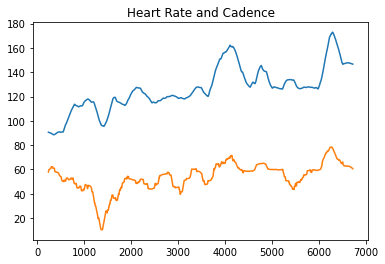

In [16]:
# Plot heart rate over time
# Plot cadence over time
# Duration of the run
# Avg distance between points!

import matplotlib.pyplot as plt
%matplotlib inline

df['hr'].rolling(240).mean().plot()
df['cad'].rolling(240).mean().plot()
plt.title("Heart Rate and Cadence");

Text(0.5, 1.0, 'Cadence')

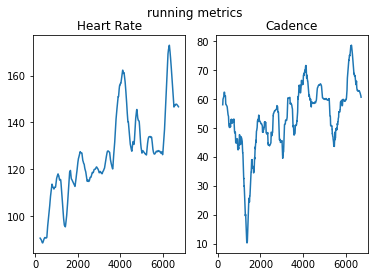

In [17]:
# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('running metrics')

df['hr'].rolling(240).mean().plot(ax=ax1)
ax1.set_title("Heart Rate")
df['cad'].rolling(240).mean().plot(ax=ax2);
ax2.set_title("Cadence")

In [18]:
import numpy as np 
df.describe(percentiles=np.arange(0, 1, .10))

,lat,lon,hr,cad
count,6722.000000,6722.000000,6722.000000,6722.000000
mean,39.535299,-105.159246,126.072895,53.939601
std,0.004307,0.005165,20.264309,19.954574
min,39.529147,-105.168793,80.000000,0.000000
0%,39.529147,-105.168793,80.000000,0.000000
10%,39.529875,-105.165529,95.000000,0.000000
20%,39.530839,-105.164082,114.000000,53.000000
30%,39.532800,-105.163447,118.000000,55.000000
40%,39.533802,-105.160888,121.000000,58.000000
50%,39.534777,-105.159512,124.000000,59.000000


In [19]:
df['date_timestamp'].min()

Timestamp('2021-06-19 17:47:48+0000', tz='UTC')

In [20]:
run_time = df['date_timestamp'].max() - df['date_timestamp'].min()
run_time.total_seconds()

# Timedelta to other statistics, hour, minutes, seconds?
# Finish the dual axis plot
# Compute the distance between points

6721.0

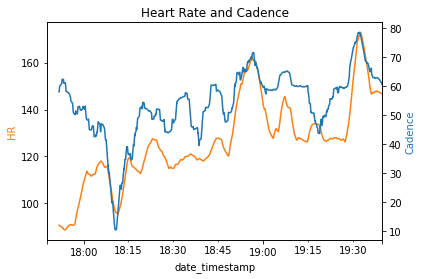

In [21]:
ax1 = df.set_index('date_timestamp')['hr'].rolling(240).mean().plot(color='tab:orange')
ax2 = df.set_index('date_timestamp')['cad'].rolling(240).mean().plot(secondary_y=True, color='tab:blue')
ax1.set_ylabel("HR", color='tab:orange')
ax2.set_ylabel("Cadence", color='tab:blue')
plt.title("Heart Rate and Cadence");

In [23]:
import geopy.distance


def get_distance_between_points(point1: tuple, point2: tuple):
  try:
    return geopy.distance.vincenty(point1, point2).m
  except ValueError:
    return 0

df['prior_timestamp'] = df.date_timestamp.shift(1)
df['prior_lat'] = df['lat'].shift(1)
df['prior_lon'] = df.lon.shift(1)
df['ll_tuple'] = df.apply(lambda row: (row.lat, row.lon), axis=1)
df['ll_tuple_prev'] = df.apply(lambda row: (row.prior_lat, row.prior_lon), axis=1)
df['dist_between'] = df.apply(lambda row: 
                              get_distance_between_points(row.ll_tuple, row.ll_tuple_prev)  
                    ,axis=1)

START_LAT_LON = df.iloc[0].ll_tuple
START_TIME = df.iloc[0].date_timestamp

df['dist_from_start_meters'] = df.apply(lambda row: get_distance_between_points(row.ll_tuple, START_LAT_LON), axis=1)
df['time_since_run_began_seconds'] = df.apply(lambda row: (row.date_timestamp - START_TIME).total_seconds(), axis=1)

# Time elapses since run began
df.head()

,lat,lon,time,hr,cad,date_timestamp,prior_timestamp,prior_lat,prior_lon,ll_tuple,ll_tuple_prev,dist_between,dist_from_start_meters,time_since_run_began_seconds
0,39.543185,-105.152097,2021-06-19T17:47:48.000Z,93,58,2021-06-19 17:47:48+00:00,NaT,NaN,NaN,"(39.543185234069824, -105.15209661796689)","(nan, nan)",0.000000,0.000000,0.0
1,39.543172,-105.152091,2021-06-19T17:47:49.000Z,93,0,2021-06-19 17:47:49+00:00,2021-06-19 17:47:48+00:00,39.543185,-105.152097,"(39.54317224211991, -105.15209142118692)","(39.543185234069824, -105.15209661796689)",1.510031,1.510031,1.0
2,39.543157,-105.152090,2021-06-19T17:47:50.000Z,93,0,2021-06-19 17:47:50+00:00,2021-06-19 17:47:49+00:00,39.543172,-105.152091,"(39.54315673559904, -105.15208974480629)","(39.54317224211991, -105.15209142118692)",1.727645,3.218755,2.0
3,39.543141,-105.152089,2021-06-19T17:47:51.000Z,93,0,2021-06-19 17:47:51+00:00,2021-06-19 17:47:50+00:00,39.543157,-105.152090,"(39.543141312897205, -105.15208857133985)","(39.54315673559904, -105.15208974480629)",1.715287,4.925198,3.0
4,39.543125,-105.152091,2021-06-19T17:47:52.000Z,93,0,2021-06-19 17:47:52+00:00,2021-06-19 17:47:51+00:00,39.543141,-105.152089,"(39.54312496818602, -105.15209091827273)","(39.543141312897205, -105.15208857133985)",1.825865,6.708986,4.0


In [ ]:
# What's the avg distance traveled second by second? 
# At what point was I furthest from my starting point?

df[df['dist_between'] < 2.25]['dist_between'].hist(bins=20)

In [ ]:
df.set_index('date_timestamp').dist_from_start.plot()

In [25]:
# Calculate the elevation at any given datapoint. How HIgh was I at max height
# How high was I during the run?
# Do i need to call the API 6700 times?

# https://nationalmap.gov/epqs/

def gen_url(lat_lon: tuple):
  lon = lat_lon[1]
  lat = lat_lon[0]
  return f"https://nationalmap.gov/epqs/pqs.php?x={lon}&y={lat}&units=Feet&output=json"


df['geo_url'] = df.ll_tuple.map(gen_url)
# Try to use requests and .mpa to fetch the endpoint. 6700 requests. 
df.head()

,lat,lon,time,hr,cad,date_timestamp,prior_timestamp,prior_lat,prior_lon,ll_tuple,ll_tuple_prev,dist_between,dist_from_start_meters,time_since_run_began_seconds,geo_url
0,39.543185,-105.152097,2021-06-19T17:47:48.000Z,93,58,2021-06-19 17:47:48+00:00,NaT,NaN,NaN,"(39.543185234069824, -105.15209661796689)","(nan, nan)",0.000000,0.000000,0.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...
1,39.543172,-105.152091,2021-06-19T17:47:49.000Z,93,0,2021-06-19 17:47:49+00:00,2021-06-19 17:47:48+00:00,39.543185,-105.152097,"(39.54317224211991, -105.15209142118692)","(39.543185234069824, -105.15209661796689)",1.510031,1.510031,1.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...
2,39.543157,-105.152090,2021-06-19T17:47:50.000Z,93,0,2021-06-19 17:47:50+00:00,2021-06-19 17:47:49+00:00,39.543172,-105.152091,"(39.54315673559904, -105.15208974480629)","(39.54317224211991, -105.15209142118692)",1.727645,3.218755,2.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...
3,39.543141,-105.152089,2021-06-19T17:47:51.000Z,93,0,2021-06-19 17:47:51+00:00,2021-06-19 17:47:50+00:00,39.543157,-105.152090,"(39.543141312897205, -105.15208857133985)","(39.54315673559904, -105.15208974480629)",1.715287,4.925198,3.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...
4,39.543125,-105.152091,2021-06-19T17:47:52.000Z,93,0,2021-06-19 17:47:52+00:00,2021-06-19 17:47:51+00:00,39.543141,-105.152089,"(39.54312496818602, -105.15209091827273)","(39.543141312897205, -105.15208857133985)",1.825865,6.708986,4.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...


In [55]:
def get_geo_feet_response(url) -> float:
  resp = requests.get(url)
  if resp.status_code == 200:
    try:
      return float(resp.json()['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation'])
    except KeyError:
      print(f'missing key {url}')
      return 0.0
  else:
    print(f'something went wrong at {url}')
    return 0.0


sample_df = df.sample(100)
sample_df['elevation_feet'] = sample_df.geo_url.map(get_geo_feet_response)
sample_df.head()

,lat,lon,time,hr,cad,date_timestamp,prior_timestamp,prior_lat,prior_lon,ll_tuple,ll_tuple_prev,dist_between,dist_from_start_meters,time_since_run_began_seconds,geo_url,elevation_feet
775,39.537343,-105.151529,2021-06-19T18:00:43.000Z,110,0,2021-06-19 18:00:43+00:00,2021-06-19 18:00:42+00:00,39.537341,-105.151519,"(39.53734313137829, -105.15152874402702)","(39.53734086826444, -105.15151893720031)",0.879710,650.458607,775.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...,6264.89
1600,39.534737,-105.158652,2021-06-19T18:14:28.000Z,119,48,2021-06-19 18:14:28+00:00,2021-06-19 18:14:27+00:00,39.534745,-105.158640,"(39.53473728150129, -105.15865243971348)","(39.534744657576084, -105.15863978303969)",1.361840,1094.233895,1600.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...,6601.19
6583,39.542768,-105.154756,2021-06-19T19:37:31.000Z,156,61,2021-06-19 19:37:31+00:00,2021-06-19 19:37:30+00:00,39.542750,-105.154772,"(39.542768402025104, -105.15475552529097)","(39.54275029711425, -105.15477228909731)",2.473278,233.199049,6583.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...,6167.78
1072,39.536119,-105.155301,2021-06-19T18:05:40.000Z,121,0,2021-06-19 18:05:40+00:00,2021-06-19 18:05:39+00:00,39.536126,-105.155291,"(39.536118786782026, -105.1553008519113)","(39.53612624667585, -105.15529146417975)",1.156422,831.507149,1072.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...,6391.97
3889,39.535259,-105.164326,2021-06-19T18:52:37.000Z,153,79,2021-06-19 18:52:37+00:00,2021-06-19 18:52:36+00:00,39.535250,-105.164347,"(39.53525939024985, -105.16432606615126)","(39.535250002518296, -105.1643467694521)",2.062578,1370.983293,3889.0,https://nationalmap.gov/epqs/pqs.php?x=-105.16...,7101.50


In [64]:
def get_api_response(lat_lon: tuple):
  lon = lat_lon[1]
  lat = lat_lon[0]
  url = f"https://nationalmap.gov/epqs/pqs.php?x={lon}&y={lat}&units=Feet&output=json"
  # print(url)
  
  resp = requests.get(url)
  if resp.status_code == 200:
    return resp.json()
  return {}

# ['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation']
sample_df = df.sample(5)
sample_df['geo_response'] = sample_df.ll_tuple.map(get_api_response)
sample_df['elevation_feet'] = sample_df.geo_response.map(lambda x: 
                              x['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation']
)
sample_df.head()

,lat,lon,time,hr,cad,date_timestamp,prior_timestamp,prior_lat,prior_lon,ll_tuple,ll_tuple_prev,dist_between,dist_from_start_meters,time_since_run_began_seconds,geo_url,geo_response,elevation_feet
6374,39.543895,-105.157477,2021-06-19T19:34:02.000Z,145,61,2021-06-19 19:34:02+00:00,2021-06-19 19:34:01+00:00,39.543910,-105.157479,"(39.543894762173295, -105.15747712925076)","(39.543910436332226, -105.1574785541743)",1.744542,469.168033,6374.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...,{'USGS_Elevation_Point_Query_Service': {'Eleva...,6232.13
935,39.536602,-105.153797,2021-06-19T18:03:23.000Z,114,0,2021-06-19 18:03:23+00:00,2021-06-19 18:03:22+00:00,39.536609,-105.153782,"(39.5366020873189, -105.15379663556814)","(39.53660946339369, -105.15378238633275)",1.473507,745.366143,935.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...,{'USGS_Elevation_Point_Query_Service': {'Eleva...,6300.81
4834,39.531372,-105.160760,2021-06-19T19:08:22.000Z,130,59,2021-06-19 19:08:22+00:00,2021-06-19 19:08:21+00:00,39.531360,-105.160754,"(39.53137194737792, -105.1607596501708)","(39.53136021271348, -105.16075445339084)",1.377329,1508.269046,4834.0,https://nationalmap.gov/epqs/pqs.php?x=-105.16...,{'USGS_Elevation_Point_Query_Service': {'Eleva...,6761.89
6590,39.542896,-105.154692,2021-06-19T19:37:38.000Z,151,63,2021-06-19 19:37:38+00:00,2021-06-19 19:37:37+00:00,39.542876,-105.154700,"(39.54289639368653, -105.15469173900783)","(39.54287627711892, -105.1547003723681)",2.353527,225.370748,6590.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...,{'USGS_Elevation_Point_Query_Service': {'Eleva...,6151.67
1711,39.534017,-105.159702,2021-06-19T18:16:19.000Z,114,54,2021-06-19 18:16:19+00:00,2021-06-19 18:16:18+00:00,39.534024,-105.159687,"(39.53401735983789, -105.15970202162862)","(39.53402356244624, -105.15968659892678)",1.494077,1209.760629,1711.0,https://nationalmap.gov/epqs/pqs.php?x=-105.15...,{'USGS_Elevation_Point_Query_Service': {'Eleva...,6668.97


In [56]:
sample_df.set_index('date_timestamp')['elevation_feet'].max()

7127.49

In [57]:
# temp = sample_df.iloc[0].elevation_response.json()
# temp['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation']

In [65]:
# # https://www.geeksforgeeks.org/python-plotting-google-map-using-gmplot-package/
!pip install gmplot -q
import gmplot
from datetime import datetime 

In [77]:
sample_df = df.sample(1000)

latitude_list = sample_df['lat'].to_list()
longitude_list = sample_df['lon'].to_list()
  
gmap3 = gmplot.GoogleMapPlotter(latitude_list[0], longitude_list[0], 13)
  
# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, '# FF0000',
                              size = 10, marker = True )
  
# Plot method Draw a line in
# between given coordinates
gmap3.plot(latitude_list, longitude_list, 
           'cornflowerblue', edge_width = 2.5)

NOW = datetime.now().strftime('%Y-%m-%d-%H-%M')

gmap3.draw(f'mymap_{NOW}.html')

/usr/local/lib/python3.7/dist-packages/gmplot/color.py:194: UserWarning: Color '# FF0000' isn't supported.
  warnings.warn("Color '%s' isn't supported." % color)


'2022-02-06-15-18'